In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import emojis

# Сербский книжный клуб 

In [2]:
pip install emojis 

Note: you may need to restart the kernel to use updated packages.


In [69]:
cd "C:\Users\user\Downloads\Telegram Desktop\ChatExport_2025-03-22 (1)"

C:\Users\user\Downloads\Telegram Desktop\ChatExport_2025-03-22 (1)


In [70]:
f = open('result.json', 'r', encoding='utf-8')
data = json.load(f)
f.close()
data

In [52]:
len(data['messages'])

11314

In [ ]:
# Словарь для датафрейма
d = {'date':[], 'from':[], 'text':[]}

for message in data['messages']:
    if message['type'] == 'message':
        d['date'].append(message['date'])
        d['from'].append(message['from_id'])
        if 'text' in message:
            d['text'].append(message['text'])
        else:
            d['text'].append('')
    else:
        print(message) # то, что не относится к сообщениям

In [72]:
# Создание датафрейма из словаря
df_serb_club = pd.DataFrame(d)
df_serb_club

,date,from,text
0,2022-12-16T13:01:23,user449860694,я сразу душнилу включу)))
1,2022-12-16T13:01:31,user449860694,а чё сразу Белградский?
2,2022-12-16T13:02:17,user136371002,Упс
3,2022-12-16T13:07:04,user213986630,Упс!
4,2022-12-16T13:07:22,user213986630,Исправилась
...,...,...,...
10036,2025-03-22T01:52:09,user213986630,да я уже
10037,2025-03-22T13:28:26,user733946119,"[{'type': 'mention', 'text': '@banofbot'}]"
10038,2025-03-22T13:28:29,user313092884,"[🔫 , {'type': 'mention_name', 'text': 'Михаил'..."
10039,2025-03-22T15:47:25,user179415036,"Я на месте, заняла стол на втором этаже"


In [ ]:
# Сообщения с ссылками
for idx in df_serb_club.index:
    if type(df_serb_club.loc[idx, 'text']) != str:
        print(idx)
        print(df_serb_club.loc[idx, 'text'])

In [75]:
# Удалим ссылки из df и преобразуем list в str
for idx in df_serb_club.index:
    if type(df_serb_club.loc[idx, 'text']) == list:
        new_string = ''
        for elem in df_serb_club.loc[idx, 'text']:
            if type(elem) == str:
                new_string += elem
        df_serb_club.loc[idx, 'text'] = new_string

# Оставим только сообщения с текстом
df_serb_club = df_serb_club[df_serb_club['text'] != '']

# Обработка имеющихся колонок, я преобразовала столбец "date" в datetime
df_serb_club['date'] = pd.to_datetime(df_serb_club['date'], format='%Y-%m-%dT%H:%M:%S')

df_serb_club

C:\Users\user\AppData\Local\Temp\ipykernel_25196\3293045612.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serb_club['date'] = pd.to_datetime(df_serb_club['date'], format='%Y-%m-%dT%H:%M:%S')


,date,from,text
0,2022-12-16 13:01:23,user449860694,я сразу душнилу включу)))
1,2022-12-16 13:01:31,user449860694,а чё сразу Белградский?
2,2022-12-16 13:02:17,user136371002,Упс
3,2022-12-16 13:07:04,user213986630,Упс!
4,2022-12-16 13:07:22,user213986630,Исправилась
...,...,...,...
10035,2025-03-22 01:51:54,user313092884,🔫 кикнут — вернуть этого пользователя можно т...
10036,2025-03-22 01:52:09,user213986630,да я уже
10038,2025-03-22 13:28:29,user313092884,🔫 кикнут — вернуть этого пользователя можно т...
10039,2025-03-22 15:47:25,user179415036,"Я на месте, заняла стол на втором этаже"


In [76]:
# извлекла день недели
df_serb_club['day_of_week'] = df_serb_club['date'].dt.day_name()

# создала колонку, которая будет содержать год и месяц отправки сообщения,  исп метод to_period
df_serb_club['year_month'] = df_serb_club['date'].dt.to_period("M")

# извлекла чаc минуту и секунду отправки сообщения
df_serb_club['time_message'] = df_serb_club['date'].dt.time

# топ-10 пользователей  по активности в чате т.е находим 10 самых активных пользователей в чате
top = df_serb_club['from'].value_counts().head(10).index

# здесь я создала анонимную фнукцию на основе переменной "top" для того чтобы создать новый столбец, кот-ый будет говорить нам входит ли этот пользователь в топ-10 или нет
df_serb_club['top'] = df_serb_club['from'].apply(lambda x: 'Топ-10' if x in top else 'не входит')

# преобразовала столбец date,чтобы там было только число, месяц и год отправки, так как он содержал еще и время отправки сообщений, есть для этого отдельный столбец
df_serb_club['date'] = df_serb_club['date'].dt.strftime('%d.%m.%Y')
df_serb_club

C:\Users\user\AppData\Local\Temp\ipykernel_25196\4119919189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serb_club['day_of_week'] = df_serb_club['date'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_25196\4119919189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serb_club['year_month'] = df_serb_club['date'].dt.to_period("M")
C:\Users\user\AppData\Local\Temp\ipykernel_25196\4119919189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,date,from,text,day_of_week,year_month,time_message,top
0,16.12.2022,user449860694,я сразу душнилу включу))),Friday,2022-12,13:01:23,не входит
1,16.12.2022,user449860694,а чё сразу Белградский?,Friday,2022-12,13:01:31,не входит
2,16.12.2022,user136371002,Упс,Friday,2022-12,13:02:17,не входит
3,16.12.2022,user213986630,Упс!,Friday,2022-12,13:07:04,Топ-10
4,16.12.2022,user213986630,Исправилась,Friday,2022-12,13:07:22,Топ-10
...,...,...,...,...,...,...,...
10035,22.03.2025,user313092884,🔫 кикнут — вернуть этого пользователя можно т...,Saturday,2025-03,01:51:54,не входит
10036,22.03.2025,user213986630,да я уже,Saturday,2025-03,01:52:09,Топ-10
10038,22.03.2025,user313092884,🔫 кикнут — вернуть этого пользователя можно т...,Saturday,2025-03,13:28:29,не входит
10039,22.03.2025,user179415036,"Я на месте, заняла стол на втором этаже",Saturday,2025-03,15:47:25,Топ-10


In [77]:
# посчитала длину сообщений при помощи анонимной фцнкции
df_serb_club['len_messages'] = df_serb_club['text'].apply(lambda x: len(x))

# добавила еще один столбец с информацией о длине сообщений, если сообщение содержит больше 100 симовлов, оно считается длинным, если нет, то коротким
df_serb_club['short_long'] = df_serb_club['len_messages'].apply(lambda x: 'Длинное сообщение' if x > 100 else 'Короткое сообщение' )

df_serb_club

C:\Users\user\AppData\Local\Temp\ipykernel_25196\1954387297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serb_club['len_messages'] = df_serb_club['text'].apply(lambda x: len(x))
C:\Users\user\AppData\Local\Temp\ipykernel_25196\1954387297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serb_club['short_long'] = df_serb_club['len_messages'].apply(lambda x: 'Длинное сообщение' if x > 100 else 'Короткое сообщение' )


,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long
0,16.12.2022,user449860694,я сразу душнилу включу))),Friday,2022-12,13:01:23,не входит,25,Короткое сообщение
1,16.12.2022,user449860694,а чё сразу Белградский?,Friday,2022-12,13:01:31,не входит,23,Короткое сообщение
2,16.12.2022,user136371002,Упс,Friday,2022-12,13:02:17,не входит,3,Короткое сообщение
3,16.12.2022,user213986630,Упс!,Friday,2022-12,13:07:04,Топ-10,4,Короткое сообщение
4,16.12.2022,user213986630,Исправилась,Friday,2022-12,13:07:22,Топ-10,11,Короткое сообщение
...,...,...,...,...,...,...,...,...,...
10035,22.03.2025,user313092884,🔫 кикнут — вернуть этого пользователя можно т...,Saturday,2025-03,01:51:54,не входит,112,Длинное сообщение
10036,22.03.2025,user213986630,да я уже,Saturday,2025-03,01:52:09,Топ-10,8,Короткое сообщение
10038,22.03.2025,user313092884,🔫 кикнут — вернуть этого пользователя можно т...,Saturday,2025-03,13:28:29,не входит,112,Длинное сообщение
10039,22.03.2025,user179415036,"Я на месте, заняла стол на втором этаже",Saturday,2025-03,15:47:25,Топ-10,39,Короткое сообщение


In [78]:
# активность по часам, минутам и секундам, сколько сообщений было отправлено в опред.время
hourly_activ = df_serb_club["time_message"].value_counts().sort_index()

# активность по дням недели
weekday_activ = df_serb_club["day_of_week"].value_counts()

# за какой период больше было отправлено сообщений
hhhh = df_serb_club["year_month"].value_counts()

print("\nАктивность по часам:")
print(hourly_activ)

print("\nАктивность по дням недели:")
print(weekday_activ)

print('\nАктивность по году и месяцу:')
print(hhhh)


Активность по часам:
time_message
00:00:06    1
00:00:16    1
00:00:20    1
00:00:21    2
00:00:31    1
           ..
23:59:26    1
23:59:29    1
23:59:34    1
23:59:53    1
23:59:55    1
Name: count, Length: 8513, dtype: int64

Активность по дням недели:
day_of_week
Saturday     1612
Sunday       1464
Friday       1418
Wednesday    1268
Thursday     1177
Tuesday      1148
Monday       1095
Name: count, dtype: int64

Активность по году и месяцу:
year_month
2024-12    944
2024-09    930
2024-04    474
2024-03    401
2022-12    398
2023-07    376
2023-09    363
2024-02    344
2024-06    330
2023-01    307
2024-05    306
2024-11    297
2024-08    296
2023-08    296
2024-10    291
2023-12    288
2023-11    276
2025-03    269
2025-02    265
2025-01    236
2023-02    229
2023-06    223
2024-01    218
2023-05    213
2023-03    186
2023-04    149
2023-10    143
2024-07    134
Freq: M, Name: count, dtype: int64


# Книжный клуб Санкт-Петербурга

In [82]:
cd "C:\Users\user\Downloads\Telegram Desktop\ChatExport_2025-03-22"

C:\Users\user\Downloads\Telegram Desktop\ChatExport_2025-03-22


In [83]:
f = open('result.json', 'r', encoding='utf-8')
data_1 = json.load(f)
f.close()
data_1

In [85]:
len(data_1['messages'])

31826

In [ ]:
# Словарь для датафрейма
d_1 = {'date':[], 'from':[], 'text':[]}

for message in data_1['messages']:
    if message['type'] == 'message':
        d_1['date'].append(message['date'])
        d_1['from'].append(message['from_id'])
        if 'text' in message:
            d_1['text'].append(message['text'])
        else:
            d_1['text'].append('')
    else:
        print(message) # то, что не относится к сообщениям

In [92]:
# Создание датафрейма из словаря
df_spb_club = pd.DataFrame(d_1)
df_spb_club

,date,from,text
0,2019-12-21T12:40:05,user129902777,"[{'type': 'bold', 'text': 'ГЛАЗНЫЕ ДЕВОЧКИ, ГЛ..."
1,2019-12-22T11:34:55,user278305859,Напишите кто какие книги кидал в шляпу. Света ...
2,2019-12-22T11:46:05,user864210295,В смысле придумать?
3,2019-12-22T11:46:48,user278305859,Ту что она выбрала нет в интернете
4,2019-12-22T12:05:52,user179960469,"Я кидала «Мэбэт», Александр Григоренко."
...,...,...,...
29917,2025-03-22T11:48:43,user1763627545,"Вот кстати соглашусь, это пострашнее всех Звон..."
29918,2025-03-22T14:48:48,user855068019,1901
29919,2025-03-22T15:38:23,user276986398,Многообещающий член клуба
29920,2025-03-22T15:45:48,user129902777,Сегодня прям нашествие)


In [ ]:
# Сообщения с ссылками
for idx_1 in df_spb_club.index:
    if type(df_spb_club.loc[idx_1, 'text']) != str:
        print(idx_1)
        print(df_spb_club.loc[idx_1, 'text'])

In [98]:
# Удалим ссылки из df и преобразуем list в str
for idx_1 in df_spb_club.index:
    if type(df_spb_club.loc[idx_1, 'text']) == list:
        new_string_1 = ''
        for elem_1 in df_spb_club.loc[idx_1, 'text']:
            if type(elem_1) == str:
                new_string_1 += elem_1
        df_spb_club.loc[idx_1, 'text'] = new_string_1

# Оставим только сообщения с текстом
df_spb_club = df_spb_club[df_spb_club['text'] != '']

# Обработка имеющихся колонок, я преобразовала столбец "date" в datetime
df_spb_club['date'] = pd.to_datetime(df_spb_club['date'], format='%Y-%m-%dT%H:%M:%S')

df_spb_club

,date,from,text
0,2019-12-21 12:40:05,user129902777,\n\nВо многих индоевропейских и неиндоевропейс...
1,2019-12-22 11:34:55,user278305859,Напишите кто какие книги кидал в шляпу. Света ...
2,2019-12-22 11:46:05,user864210295,В смысле придумать?
3,2019-12-22 11:46:48,user278305859,Ту что она выбрала нет в интернете
4,2019-12-22 12:05:52,user179960469,"Я кидала «Мэбэт», Александр Григоренко."
...,...,...,...
29917,2025-03-22 11:48:43,user1763627545,"Вот кстати соглашусь, это пострашнее всех Звон..."
29918,2025-03-22 14:48:48,user855068019,1901
29919,2025-03-22 15:38:23,user276986398,Многообещающий член клуба
29920,2025-03-22 15:45:48,user129902777,Сегодня прям нашествие)


In [99]:
# извлекла день недели
df_spb_club['day_of_week'] = df_spb_club['date'].dt.day_name()

# создала колонку, которая будет содержать год и месяц отправки сообщения,  исп метод to_period
df_spb_club['year_month'] = df_spb_club['date'].dt.to_period("M")

# извлекла чаc минуту и секунду отправки сообщения
df_spb_club['time_message'] = df_spb_club['date'].dt.time

# топ-10 пользователей  по активности в чате т.е находим 10 самых активных пользователей в чате
top = df_spb_club['from'].value_counts().head(10).index

# здесь я создала анонимную фнукцию на основе переменной "top" для того чтобы создать новый столбец, кот-ый будет говорить нам входит ли этот пользователь в топ-10 или нет
df_spb_club['top'] = df_spb_club['from'].apply(lambda x: 'Топ-10' if x in top else 'не входит')

# преобразовала столбец date,чтобы там было только число, месяц и год отправки, так как он содержал еще и время отправки сообщений, есть для этого отдельный столбец
df_spb_club['date'] = df_spb_club['date'].dt.strftime('%d.%m.%Y')
df_spb_club

,date,from,text,day_of_week,year_month,time_message,top
0,21.12.2019,user129902777,\n\nВо многих индоевропейских и неиндоевропейс...,Saturday,2019-12,12:40:05,Топ-10
1,22.12.2019,user278305859,Напишите кто какие книги кидал в шляпу. Света ...,Sunday,2019-12,11:34:55,Топ-10
2,22.12.2019,user864210295,В смысле придумать?,Sunday,2019-12,11:46:05,Топ-10
3,22.12.2019,user278305859,Ту что она выбрала нет в интернете,Sunday,2019-12,11:46:48,Топ-10
4,22.12.2019,user179960469,"Я кидала «Мэбэт», Александр Григоренко.",Sunday,2019-12,12:05:52,Топ-10
...,...,...,...,...,...,...,...
29917,22.03.2025,user1763627545,"Вот кстати соглашусь, это пострашнее всех Звон...",Saturday,2025-03,11:48:43,не входит
29918,22.03.2025,user855068019,1901,Saturday,2025-03,14:48:48,не входит
29919,22.03.2025,user276986398,Многообещающий член клуба,Saturday,2025-03,15:38:23,не входит
29920,22.03.2025,user129902777,Сегодня прям нашествие),Saturday,2025-03,15:45:48,Топ-10


In [100]:
# посчитала длину сообщений при помощи анонимной фцнкции
df_spb_club['len_messages'] = df_spb_club['text'].apply(lambda x: len(x))

# добавила еще один столбец с информацией о длине сообщений, если сообщение содержит больше 100 симовлов, оно считается длинным, если нет, то коротким
df_spb_club['short_long'] = df_spb_club['len_messages'].apply(lambda x: 'Длинное сообщение' if x > 100 else 'Короткое сообщение' )

df_spb_club

,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long
0,21.12.2019,user129902777,\n\nВо многих индоевропейских и неиндоевропейс...,Saturday,2019-12,12:40:05,Топ-10,4042,Длинное сообщение
1,22.12.2019,user278305859,Напишите кто какие книги кидал в шляпу. Света ...,Sunday,2019-12,11:34:55,Топ-10,94,Короткое сообщение
2,22.12.2019,user864210295,В смысле придумать?,Sunday,2019-12,11:46:05,Топ-10,19,Короткое сообщение
3,22.12.2019,user278305859,Ту что она выбрала нет в интернете,Sunday,2019-12,11:46:48,Топ-10,34,Короткое сообщение
4,22.12.2019,user179960469,"Я кидала «Мэбэт», Александр Григоренко.",Sunday,2019-12,12:05:52,Топ-10,39,Короткое сообщение
...,...,...,...,...,...,...,...,...,...
29917,22.03.2025,user1763627545,"Вот кстати соглашусь, это пострашнее всех Звон...",Saturday,2025-03,11:48:43,не входит,64,Короткое сообщение
29918,22.03.2025,user855068019,1901,Saturday,2025-03,14:48:48,не входит,4,Короткое сообщение
29919,22.03.2025,user276986398,Многообещающий член клуба,Saturday,2025-03,15:38:23,не входит,25,Короткое сообщение
29920,22.03.2025,user129902777,Сегодня прям нашествие),Saturday,2025-03,15:45:48,Топ-10,23,Короткое сообщение


In [101]:
result_only_2 = pd.concat([df_serb_club, df_spb_club], ignore_index=True)

In [102]:
result_only_2

,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long
0,16.12.2022,user449860694,я сразу душнилу включу))),Friday,2022-12,13:01:23,не входит,25,Короткое сообщение
1,16.12.2022,user449860694,а чё сразу Белградский?,Friday,2022-12,13:01:31,не входит,23,Короткое сообщение
2,16.12.2022,user136371002,Упс,Friday,2022-12,13:02:17,не входит,3,Короткое сообщение
3,16.12.2022,user213986630,Упс!,Friday,2022-12,13:07:04,Топ-10,4,Короткое сообщение
4,16.12.2022,user213986630,Исправилась,Friday,2022-12,13:07:22,Топ-10,11,Короткое сообщение
...,...,...,...,...,...,...,...,...,...
34795,22.03.2025,user1763627545,"Вот кстати соглашусь, это пострашнее всех Звон...",Saturday,2025-03,11:48:43,не входит,64,Короткое сообщение
34796,22.03.2025,user855068019,1901,Saturday,2025-03,14:48:48,не входит,4,Короткое сообщение
34797,22.03.2025,user276986398,Многообещающий член клуба,Saturday,2025-03,15:38:23,не входит,25,Короткое сообщение
34798,22.03.2025,user129902777,Сегодня прям нашествие),Saturday,2025-03,15:45:48,Топ-10,23,Короткое сообщение


# Книжный клуб на Кипре 

In [103]:
cd "C:\Users\user\Downloads\Telegram Desktop\ChatExport_2025-03-22 (2)"

C:\Users\user\Downloads\Telegram Desktop\ChatExport_2025-03-22 (2)


In [104]:
f = open('result.json', 'r', encoding='utf-8')
data_2 = json.load(f)
f.close()
data_2

In [ ]:
# Словарь для датафрейма
d_2 = {'date':[], 'from':[], 'text':[]}

for message in data_2['messages']:
    if message['type'] == 'message':
        d_2['date'].append(message['date'])
        d_2['from'].append(message['from_id'])
        if 'text' in message:
            d_2['text'].append(message['text'])
        else:
            d_2['text'].append('')
    else:
        print(message) # то, что не относится к сообщениям

In [107]:
# Создание датафрейма из словаря
df_kipr_club = pd.DataFrame(d_2)
df_kipr_club

,date,from,text
0,2022-07-09T10:11:07,user2109883837,"Добрый день, приветствую новых участников CypR..."
1,2022-07-09T10:18:12,user176494722,"[Привет, друзья-книголюбы! Приглашаем присоеди..."
2,2022-07-09T10:59:06,user2109883837,"[Привет, друзья-книголюбы! Приглашаем присоеди..."
3,2022-07-09T18:57:43,user422289124,"Я прочитала, буду на встрече!)))\n\nЯ в востор..."
4,2022-07-09T19:07:40,user176494722,Приходите и маму приводите!
...,...,...,...
3723,2025-03-21T19:53:00,user6401435707,Я удалил это сообщение и передал наверх о бесп...
3724,2025-03-21T22:24:37,user5434266369,"[Welcome , {'type': 'mention_name', 'text': 'S..."
3725,2025-03-22T11:15:32,user5434266369,"[Welcome , {'type': 'mention_name', 'text': 'В..."
3726,2025-03-22T11:54:26,user5434266369,"[Welcome , {'type': 'mention_name', 'text': 'А..."


In [ ]:
# Сообщения с ссылками
for idx_2 in df_kipr_club.index:
    if type(df_kipr_club.loc[idx_2, 'text']) != str:
        print(idx_2)
        print(df_kipr_club.loc[idx_2, 'text'])

In [110]:
# Удалим ссылки из df и преобразуем list в str
for idx_2 in df_kipr_club.index:
    if type(df_kipr_club.loc[idx_2, 'text']) == list:
        new_string_2 = ''
        for elem_2 in df_kipr_club.loc[idx_2, 'text']:
            if type(elem_2) == str:
                new_string_2 += elem_2
        df_kipr_club.loc[idx_2, 'text'] = new_string_2

# Оставим только сообщения с текстом
df_kipr_club = df_kipr_club[df_kipr_club['text'] != '']

# Обработка имеющихся колонок, я преобразовала столбец "date" в datetime
df_kipr_club['date'] = pd.to_datetime(df_kipr_club['date'], format='%Y-%m-%dT%H:%M:%S')

df_kipr_club

C:\Users\user\AppData\Local\Temp\ipykernel_25196\4044435827.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kipr_club['date'] = pd.to_datetime(df_kipr_club['date'], format='%Y-%m-%dT%H:%M:%S')


,date,from,text
0,2022-07-09 10:11:07,user2109883837,"Добрый день, приветствую новых участников CypR..."
1,2022-07-09 10:18:12,user176494722,"Привет, друзья-книголюбы! Приглашаем присоедин..."
2,2022-07-09 10:59:06,user2109883837,"Привет, друзья-книголюбы! Приглашаем присоедин..."
3,2022-07-09 18:57:43,user422289124,"Я прочитала, буду на встрече!)))\n\nЯ в востор..."
4,2022-07-09 19:07:40,user176494722,Приходите и маму приводите!
...,...,...,...
3723,2025-03-21 19:53:00,user6401435707,Я удалил это сообщение и передал наверх о бесп...
3724,2025-03-21 22:24:37,user5434266369,Welcome
3725,2025-03-22 11:15:32,user5434266369,Welcome
3726,2025-03-22 11:54:26,user5434266369,Welcome


In [111]:
# извлекла день недели
df_kipr_club['day_of_week'] = df_kipr_club['date'].dt.day_name()

# создала колонку, которая будет содержать год и месяц отправки сообщения,  исп метод to_period
df_kipr_club['year_month'] = df_kipr_club['date'].dt.to_period("M")

# извлекла чаc минуту и секунду отправки сообщения
df_kipr_club['time_message'] = df_kipr_club['date'].dt.time

# топ-10 пользователей  по активности в чате т.е находим 10 самых активных пользователей в чате
top = df_kipr_club['from'].value_counts().head(10).index

# здесь я создала анонимную фнукцию на основе переменной "top" для того чтобы создать новый столбец, кот-ый будет говорить нам входит ли этот пользователь в топ-10 или нет
df_kipr_club['top'] = df_kipr_club['from'].apply(lambda x: 'Топ-10' if x in top else 'не входит')

# преобразовала столбец date,чтобы там было только число, месяц и год отправки, так как он содержал еще и время отправки сообщений, есть для этого отдельный столбец
df_kipr_club['date'] = df_kipr_club['date'].dt.strftime('%d.%m.%Y')
df_kipr_club

C:\Users\user\AppData\Local\Temp\ipykernel_25196\1475559453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kipr_club['day_of_week'] = df_kipr_club['date'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_25196\1475559453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kipr_club['year_month'] = df_kipr_club['date'].dt.to_period("M")
C:\Users\user\AppData\Local\Temp\ipykernel_25196\1475559453.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,date,from,text,day_of_week,year_month,time_message,top
0,09.07.2022,user2109883837,"Добрый день, приветствую новых участников CypR...",Saturday,2022-07,10:11:07,Топ-10
1,09.07.2022,user176494722,"Привет, друзья-книголюбы! Приглашаем присоедин...",Saturday,2022-07,10:18:12,Топ-10
2,09.07.2022,user2109883837,"Привет, друзья-книголюбы! Приглашаем присоедин...",Saturday,2022-07,10:59:06,Топ-10
3,09.07.2022,user422289124,"Я прочитала, буду на встрече!)))\n\nЯ в востор...",Saturday,2022-07,18:57:43,не входит
4,09.07.2022,user176494722,Приходите и маму приводите!,Saturday,2022-07,19:07:40,Топ-10
...,...,...,...,...,...,...,...
3723,21.03.2025,user6401435707,Я удалил это сообщение и передал наверх о бесп...,Friday,2025-03,19:53:00,не входит
3724,21.03.2025,user5434266369,Welcome,Friday,2025-03,22:24:37,не входит
3725,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:15:32,не входит
3726,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:54:26,не входит


In [112]:
# посчитала длину сообщений при помощи анонимной фцнкции
df_kipr_club['len_messages'] = df_kipr_club['text'].apply(lambda x: len(x))

# добавила еще один столбец с информацией о длине сообщений, если сообщение содержит больше 100 симовлов, оно считается длинным, если нет, то коротким
df_kipr_club['short_long'] = df_kipr_club['len_messages'].apply(lambda x: 'Длинное сообщение' if x > 100 else 'Короткое сообщение' )

df_kipr_club

C:\Users\user\AppData\Local\Temp\ipykernel_25196\387398355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kipr_club['len_messages'] = df_kipr_club['text'].apply(lambda x: len(x))
C:\Users\user\AppData\Local\Temp\ipykernel_25196\387398355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kipr_club['short_long'] = df_kipr_club['len_messages'].apply(lambda x: 'Длинное сообщение' if x > 100 else 'Короткое сообщение' )


,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long
0,09.07.2022,user2109883837,"Добрый день, приветствую новых участников CypR...",Saturday,2022-07,10:11:07,Топ-10,169,Длинное сообщение
1,09.07.2022,user176494722,"Привет, друзья-книголюбы! Приглашаем присоедин...",Saturday,2022-07,10:18:12,Топ-10,638,Длинное сообщение
2,09.07.2022,user2109883837,"Привет, друзья-книголюбы! Приглашаем присоедин...",Saturday,2022-07,10:59:06,Топ-10,603,Длинное сообщение
3,09.07.2022,user422289124,"Я прочитала, буду на встрече!)))\n\nЯ в востор...",Saturday,2022-07,18:57:43,не входит,98,Короткое сообщение
4,09.07.2022,user176494722,Приходите и маму приводите!,Saturday,2022-07,19:07:40,Топ-10,27,Короткое сообщение
...,...,...,...,...,...,...,...,...,...
3723,21.03.2025,user6401435707,Я удалил это сообщение и передал наверх о бесп...,Friday,2025-03,19:53:00,не входит,63,Короткое сообщение
3724,21.03.2025,user5434266369,Welcome,Friday,2025-03,22:24:37,не входит,8,Короткое сообщение
3725,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:15:32,не входит,8,Короткое сообщение
3726,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:54:26,не входит,8,Короткое сообщение


создаю общий датасет, где будут хранится все три набора данных

In [114]:
result_only_3 = pd.concat([df_serb_club, df_spb_club, df_kipr_club], ignore_index=True) # сохрнила объединенный датасет в новую перменную

In [199]:
result_only_3 

,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long,time_numeric
0,16.12.2022,user449860694,я сразу душнилу включу))),Friday,2022-12,13:01:23,не входит,25,Короткое сообщение,1.742638e+09
1,16.12.2022,user449860694,а чё сразу Белградский?,Friday,2022-12,13:01:31,не входит,23,Короткое сообщение,1.742638e+09
2,16.12.2022,user136371002,Упс,Friday,2022-12,13:02:17,не входит,3,Короткое сообщение,1.742638e+09
3,16.12.2022,user213986630,Упс!,Friday,2022-12,13:07:04,Топ-10,4,Короткое сообщение,1.742638e+09
4,16.12.2022,user213986630,Исправилась,Friday,2022-12,13:07:22,Топ-10,11,Короткое сообщение,1.742638e+09
...,...,...,...,...,...,...,...,...,...,...
37537,21.03.2025,user6401435707,Я удалил это сообщение и передал наверх о бесп...,Friday,2025-03,19:53:00,не входит,63,Короткое сообщение,1.742662e+09
37538,21.03.2025,user5434266369,Welcome,Friday,2025-03,22:24:37,не входит,8,Короткое сообщение,1.742671e+09
37539,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:15:32,не входит,8,Короткое сообщение,1.742631e+09
37540,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:54:26,не входит,8,Короткое сообщение,1.742634e+09


In [382]:
# Преобразуем строку в дату и извлекаем год
result_only_3 ['year'] = pd.to_datetime(result_only_3 ['date']).dt.year 
result_only_3

C:\Users\user\AppData\Local\Temp\ipykernel_25196\3622003352.py:2: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long,time_numeric,year,month
0,16.12.2022,user449860694,я сразу душнилу включу))),Friday,2022-12,13:01:23,не входит,25,Короткое сообщение,1.742638e+09,2022,12
1,16.12.2022,user449860694,а чё сразу Белградский?,Friday,2022-12,13:01:31,не входит,23,Короткое сообщение,1.742638e+09,2022,12
2,16.12.2022,user136371002,Упс,Friday,2022-12,13:02:17,не входит,3,Короткое сообщение,1.742638e+09,2022,12
3,16.12.2022,user213986630,Упс!,Friday,2022-12,13:07:04,Топ-10,4,Короткое сообщение,1.742638e+09,2022,12
4,16.12.2022,user213986630,Исправилась,Friday,2022-12,13:07:22,Топ-10,11,Короткое сообщение,1.742638e+09,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...
37537,21.03.2025,user6401435707,Я удалил это сообщение и передал наверх о бесп...,Friday,2025-03,19:53:00,не входит,63,Короткое сообщение,1.742662e+09,2025,3
37538,21.03.2025,user5434266369,Welcome,Friday,2025-03,22:24:37,не входит,8,Короткое сообщение,1.742671e+09,2025,3
37539,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:15:32,не входит,8,Короткое сообщение,1.742631e+09,2025,3
37540,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:54:26,не входит,8,Короткое сообщение,1.742634e+09,2025,3


In [383]:
# преобразую строку в дату и извлекаю от туда месяц
result_only_3 ['month'] = pd.to_datetime(result_only_3 ['date']).dt.month
result_only_3

C:\Users\user\AppData\Local\Temp\ipykernel_25196\3763559177.py:2: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long,time_numeric,year,month
0,16.12.2022,user449860694,я сразу душнилу включу))),Friday,2022-12,13:01:23,не входит,25,Короткое сообщение,1.742638e+09,2022,12
1,16.12.2022,user449860694,а чё сразу Белградский?,Friday,2022-12,13:01:31,не входит,23,Короткое сообщение,1.742638e+09,2022,12
2,16.12.2022,user136371002,Упс,Friday,2022-12,13:02:17,не входит,3,Короткое сообщение,1.742638e+09,2022,12
3,16.12.2022,user213986630,Упс!,Friday,2022-12,13:07:04,Топ-10,4,Короткое сообщение,1.742638e+09,2022,12
4,16.12.2022,user213986630,Исправилась,Friday,2022-12,13:07:22,Топ-10,11,Короткое сообщение,1.742638e+09,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...
37537,21.03.2025,user6401435707,Я удалил это сообщение и передал наверх о бесп...,Friday,2025-03,19:53:00,не входит,63,Короткое сообщение,1.742662e+09,2025,3
37538,21.03.2025,user5434266369,Welcome,Friday,2025-03,22:24:37,не входит,8,Короткое сообщение,1.742671e+09,2025,3
37539,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:15:32,не входит,8,Короткое сообщение,1.742631e+09,2025,3
37540,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:54:26,не входит,8,Короткое сообщение,1.742634e+09,2025,3


In [297]:
result_only_3 

,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long,time_numeric,year,month
0,16.12.2022,user449860694,я сразу душнилу включу))),Friday,2022-12,13:01:23,не входит,25,Короткое сообщение,1.742638e+09,2022,12
1,16.12.2022,user449860694,а чё сразу Белградский?,Friday,2022-12,13:01:31,не входит,23,Короткое сообщение,1.742638e+09,2022,12
2,16.12.2022,user136371002,Упс,Friday,2022-12,13:02:17,не входит,3,Короткое сообщение,1.742638e+09,2022,12
3,16.12.2022,user213986630,Упс!,Friday,2022-12,13:07:04,Топ-10,4,Короткое сообщение,1.742638e+09,2022,12
4,16.12.2022,user213986630,Исправилась,Friday,2022-12,13:07:22,Топ-10,11,Короткое сообщение,1.742638e+09,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...
37537,21.03.2025,user6401435707,Я удалил это сообщение и передал наверх о бесп...,Friday,2025-03,19:53:00,не входит,63,Короткое сообщение,1.742662e+09,2025,3
37538,21.03.2025,user5434266369,Welcome,Friday,2025-03,22:24:37,не входит,8,Короткое сообщение,1.742671e+09,2025,3
37539,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:15:32,не входит,8,Короткое сообщение,1.742631e+09,2025,3
37540,22.03.2025,user5434266369,Welcome,Saturday,2025-03,11:54:26,не входит,8,Короткое сообщение,1.742634e+09,2025,3


# Решила проверить объединились датасеты или нет

In [384]:
print("Размер исходных датасетов:")
# вывожу размер каждого датасета, кол-во столбцов и строк
print(f"df_serb_club: {df_serb_club.shape}") # shape вернет мне кортеж с размером датасетов
print(f"df_spb_club: {df_spb_club.shape}")
print(f"df_kipr_club:{df_kipr_club.shape}")
print(f"Объединенный: {result_only_3.shape}")

print("\nСтруктура объединенного датасета:")
result_only_3.info()


Размер исходных датасетов:
df_serb_club: (9182, 10)
df_spb_club: (25618, 9)
df_kipr_club:(2742, 9)
Объединенный: (37542, 12)

Структура объединенного датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          37542 non-null  object 
 1   from          37542 non-null  object 
 2   text          37542 non-null  object 
 3   day_of_week   37542 non-null  object 
 4   year_month    37542 non-null  object 
 5   time_message  37542 non-null  object 
 6   top           37542 non-null  object 
 7   len_messages  37542 non-null  int64  
 8   short_long    37542 non-null  object 
 9   time_numeric  37542 non-null  float64
 10  year          37542 non-null  int32  
 11  month         37542 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(8)
memory usage: 3.2+ MB


# Импортирую все нужные мне библиотеки для визуализации данных 

In [ ]:
import plotly # импортируем библиотеку
import pandas as pd # импортируем pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Диаграмма рассеивания 

Решила создать диаграмму рассеивания для того чтобы посмотреть на корреляцию между ***временем*** отправки сообщения и ***длиной*** отправленного сообщения

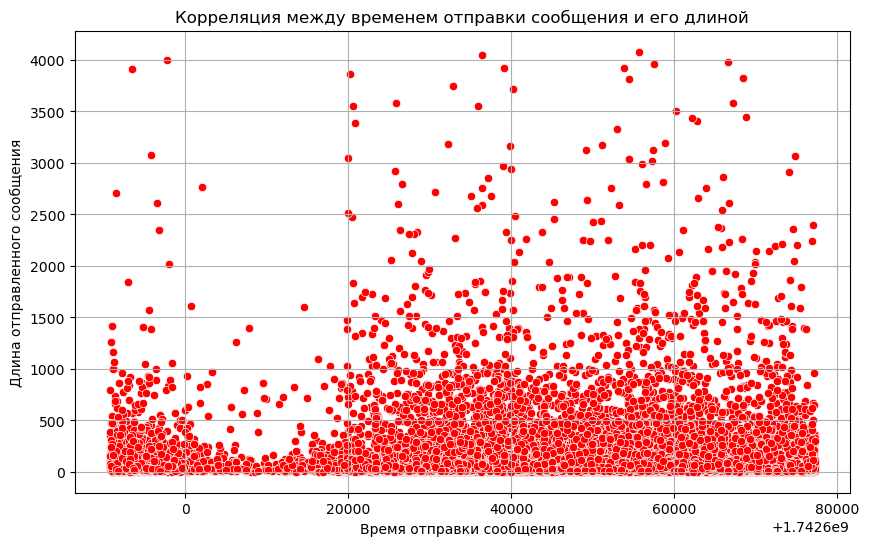

Коэффициент: -0.026336704715511028


In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time

# Преобразуем время в datetime и затем в timestamp, преобразуем время в числовое значение, иначе у нас будет выдаваться ошибка
result_only_3['time_numeric'] = result_only_3['time_message'].apply(lambda x: 
    datetime.combine(datetime.now().date(), x).timestamp())

# Создаю график корреляции
plt.figure(figsize=(10, 6)) # задаю размер диаграммы рассеяния
sns.scatterplot(data=result_only_3, x='time_numeric', y='len_messages',color='red') # говорю, что по оси x - будет время, которое мы преобразовали, а по оси y - длина отправленного сообщения
# также задаю цвет - красный
plt.title('Корреляция между временем отправки сообщения и его длиной') # подписываю название графика 
plt.xlabel('Время отправки сообщения') # подписываю график по оси x 
plt.ylabel('Длина отправленного сообщения') # подписываю график по оси y
plt.grid(True) # решила также сделать разлиновку для графика 
plt.show() # вывожу график

# Выводим корреляцию
correlation = result_only_3['time_numeric'].corr(result_only_3['len_messages']) # почитала коэффицент корреляции. далее будет корреляционная матрица 
print(f'Коэффициент: {correlation}') # текстом вывела значение 

# Результаты интерпретации

По результатам построения диаграммы рассеяния и выявления коэфицента корреляции можно сказать, что ее нет между временем отправки сообщения и длиной отправленного сообщения

# Линейная диаграмма (динамика позитивного или отрицательного роста)

Используем для категориальных данных (у нас это дни недели)
Использую чтобы показать динамику в течении времени

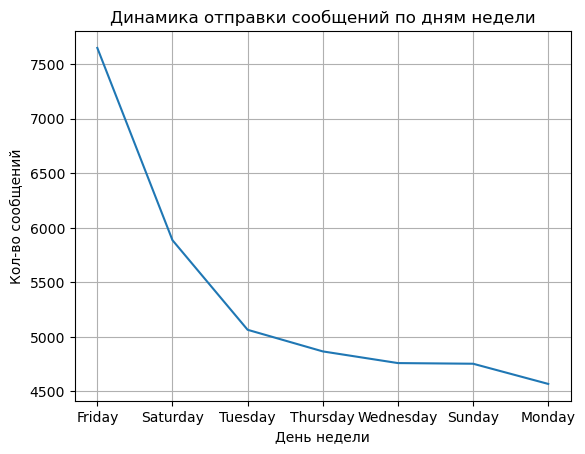

In [245]:
result_only_3["day_of_week"].value_counts().plot()
# По той же схеме, что и выше подписываю оси и название графика
plt.title('Динамика отправки сообщений по дням недели') # название графика
plt.xlabel('День недели') # по оси x 
plt.ylabel('Кол-во сообщений') # по оси y
plt.grid(True) # добавила сетку
plt.show() #вывожу график

# Тепловая карта (heatmap)

In [225]:
result_only_3.corr(numeric_only = True)  # просто вывела корреляционную матрицу по всем возможным значениям в датасете

,len_messages,time_numeric,year,month
len_messages,1.000000,-0.026337,0.067714,0.007011
time_numeric,-0.026337,1.000000,-0.084292,-0.027555
year,0.067714,-0.084292,1.000000,-0.106194
month,0.007011,-0.027555,-0.106194,1.000000


Визуализировала корреляционную матрицу в виде тепловой карты, так намного проще находить взаимозависимость в данных

<Axes: >

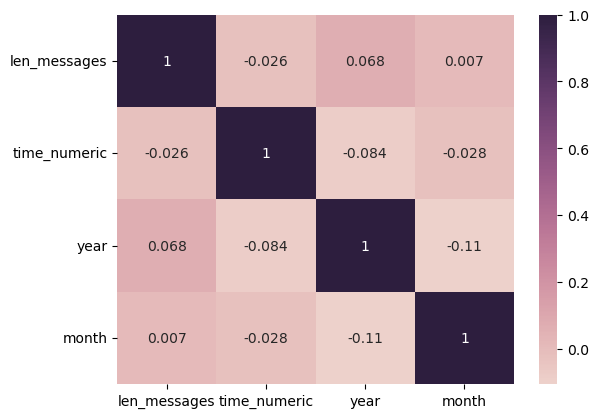

In [226]:
sns.heatmap(result_only_3.corr(numeric_only = True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))  

Решила перекрасить тепловую карту, чтобы был контраст, *linewidths* - добавила еще линии между ячейками со значениями в размере 0.5, чтобы ячейки между собой не сливались и было видно границы каждого кубика

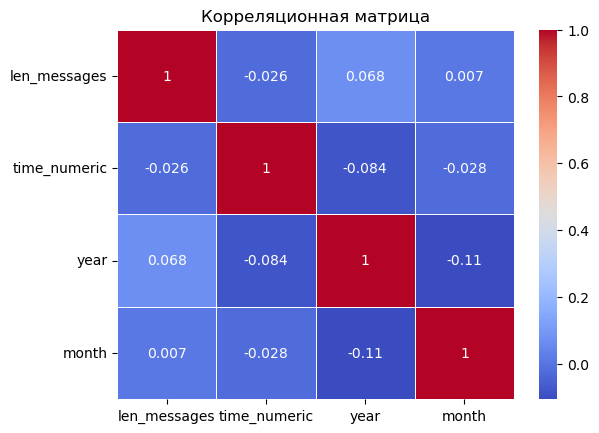

In [248]:
sns.heatmap(result_only_3.corr(numeric_only = True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица') # подписала 
plt.show() #вывела карту

# Круговая диаграмма библиотека matplotlib

Посторила простейшую круговую диаграмму. Она используется для *категориальных данных*. autopct - добавила процент в круговую диаграмму. *autopct = '% 1.1f %%'* - показывает проценты с одной десятичной дробью. Показывает процент того, сколько сообщений в чатах длинные, а сколько короткие. Перекрасила два показателя в разные цвета

<Axes: ylabel='count'>

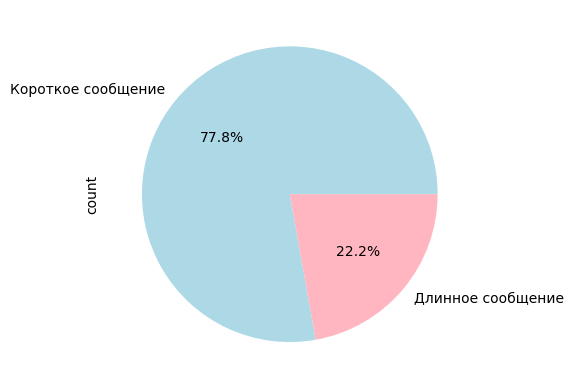

In [393]:
result_only_3['short_long'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['lightblue', 'lightpink'])

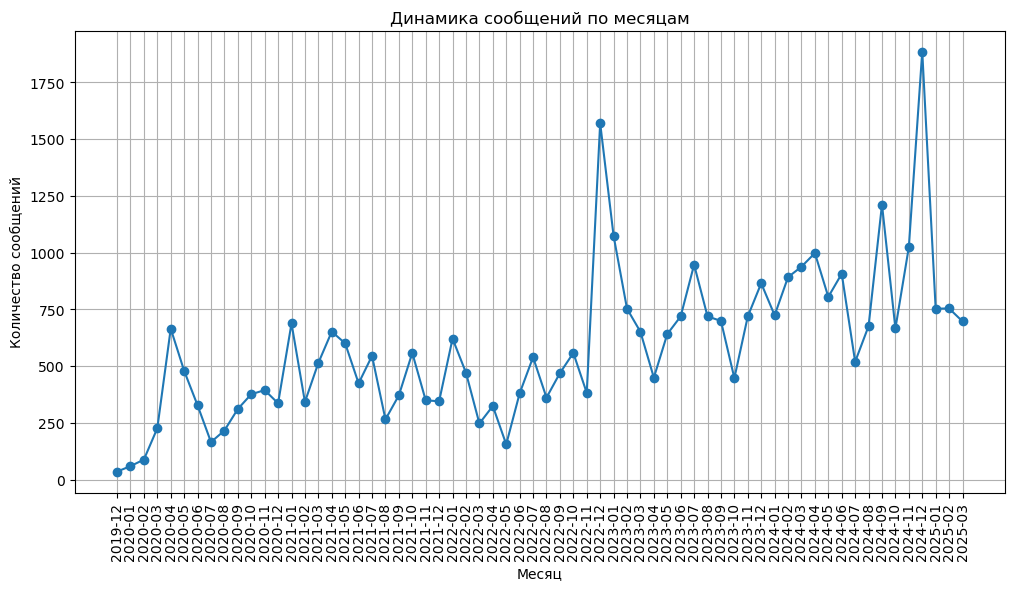

In [296]:
import matplotlib.pyplot as plt

# Группировка данных по месяцам и подсчет количества сообщений
monthly_counts = result_only_3.groupby('year_month').size()

# Построила линейный график
plt.figure(figsize=(12,6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o') # обозначила точки
plt.title('Динамика сообщений по месяцам') # Подписала график с помощью plt.title();
# Подпиcала оси y и x с помощью plt.ylabel() и plt.xlabel()
plt.xlabel('Месяц')  
plt.ylabel('Количество сообщений')
plt.xticks(rotation= 90) #указываю, что хочу, чтобы подписи точек были повернуты на 90 градусов
plt.grid(True)
plt.show()

# Построние столбчатой диаграммы (Bar chart). Группировка данных

In [307]:
user_counts = result_only_3['from'].value_counts().head(10).reset_index()
user_counts

,from,count
0,user129902777,5150
1,user213986630,1839
2,user976186648,1675
3,user179960469,1325
4,user278305859,1226
5,user897235216,1140
6,user864210295,1000
7,user852082939,941
8,user138282529,938
9,user278395797,863


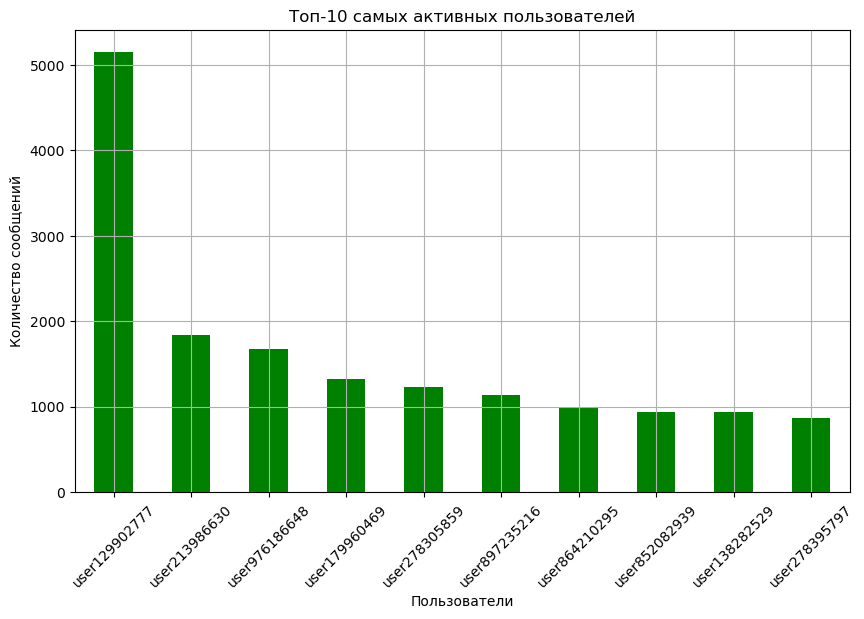

In [316]:
# группировка данных по пользователям
user_counts = result_only_3['from'].value_counts().head(10) # подсчитываем кол-во уникальных значений, то есть сколько сообщений отправил тот или иной пользователь из топ-10
# строю bar chart (столбчатая диаграмма)
plt.figure(figsize=(10, 6)) # указываю размер 
user_counts.plot(kind='bar', color='green') #строю график в формате столбчатой диаграммы и указываю цвет 
plt.title('Топ-10 самых активных пользователей') # название графика 
plt.xlabel('Пользователи') # по оси X
plt.ylabel('Количество сообщений') #название по оси Y
plt.xticks(rotation=45) # указываю, что хочу, чтобы подписи столбцов были повернуты на 45 градусов
plt.grid(True)
plt.show() #вывожу диаграмму 

# Сводные таблицы по данным 

Создаю сводную таблицу для пользователей у которых длина сообщений более 100 знаков и они входят в топ-10. Произвела фильтрацию и сохранила полученные данные в отдельную переменную "fff"

In [356]:
fff = result_only_3[(result_only_3['len_messages']>100)&(result_only_3['top']=='Топ-10')]
fff

,date,from,text,day_of_week,year_month,time_message,top,len_messages,short_long,time_numeric,year,month
5,16.12.2022,user213986630,", посмотри Почему женщины убивают 2 сезон с с...",Friday,2022-12,13:09:07,Топ-10,140,Длинное сообщение,1.742638e+09,2022,12
23,16.12.2022,user265729085,Ага. В начале года набрал скорость. Потом нача...,Friday,2022-12,13:34:06,Топ-10,137,Длинное сообщение,1.742640e+09,2022,12
25,16.12.2022,user213986630,"Я всегда рекомендую смотреть в оригинале, но с...",Friday,2022-12,13:37:27,Топ-10,157,Длинное сообщение,1.742640e+09,2022,12
26,16.12.2022,user89495090,"(я так «Андора» нагонял, у меня есть подписка ...",Friday,2022-12,13:38:07,Топ-10,109,Длинное сообщение,1.742640e+09,2022,12
53,16.12.2022,user89495090,"Костя, ты там говорил про русскоязычных авторо...",Friday,2022-12,16:14:00,Топ-10,114,Длинное сообщение,1.742649e+09,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...
37511,17.03.2025,user1404279301,"А какая красивая обновленная аватарка , Светл...",Monday,2025-03,18:17:55,Топ-10,178,Длинное сообщение,1.742657e+09,2025,3
37523,19.03.2025,channel1631834684,\n\nНецензурная лексика считается признаком ни...,Wednesday,2025-03,10:11:07,Топ-10,2304,Длинное сообщение,1.742627e+09,2025,3
37527,20.03.2025,channel1631834684,Всемирный день писателя – профессиональный пра...,Thursday,2025-03,10:05:42,Топ-10,320,Длинное сообщение,1.742627e+09,2025,3
37530,20.03.2025,channel1932042426,Кто желает присоединиться и поиграть в пятницу...,Thursday,2025-03,17:11:28,Топ-10,152,Длинное сообщение,1.742653e+09,2025,3


Создала сводную таблицу для пользователей у которых длина сообщений более 100 знаков и они входят в топ-10. В рядах у меня - user пользователя (from), в колонке длина сообщений (len_messages), в ячейках — среднее, медиана, максимум и минимум по переменной. 

In [364]:
grouped_df = fff.groupby('from')['len_messages'].agg(['mean','median','min','max']).reset_index()
grouped_df

,from,mean,median,min,max
0,channel1631834684,510.436293,363.0,101,2304
1,channel1932042426,610.761364,569.5,113,2792
2,user1026974851,181.600000,167.0,104,565
3,user129902777,616.458932,298.0,101,4078
4,user137019284,186.306667,154.0,101,900
5,user138282529,188.056604,140.0,101,698
6,user1404279301,368.736641,291.5,101,1462
7,user1404992279,252.375000,202.5,107,1297
8,user176494722,262.477273,151.5,101,1798
9,user179415036,290.436709,177.0,101,3127


In [367]:
# группировка по месяцам, в столбцах у меня месяц_год и длина сообщения, в ячейках для этого столбца у меня медианное значение длины сообщений 
median_message_length_by_month = result_only_3.groupby('year_month')['len_messages'].median().reset_index() 

,year_month,len_messages
0,2019-12,42.0
1,2020-01,26.0
2,2020-02,34.0
3,2020-03,53.5
4,2020-04,27.0
...,...,...
59,2024-11,51.0
60,2024-12,61.5
61,2025-01,59.0
62,2025-02,54.0


In [379]:
# Группировка по пользователям и категории сообщений (коротекое или длинное) подсчет количества
message_type_by_user = result_only_3.groupby(['from', 'short_long']).size().unstack(fill_value=0).reset_index()
message_type_by_user

short_long,from,Длинное сообщение,Короткое сообщение
0,channel1296863701,4,5
1,channel1458624026,1,2
2,channel1471449868,0,5
3,channel1630837777,0,1
4,channel1631834684,259,109
...,...,...,...
1001,user992000961,31,61
1002,user99642446,8,7
1003,user998714926,0,7
1004,user999075531,0,1


In [380]:
# Группировка по годам и подсчет количества сообщений
messages_by_year = result_only_3.groupby('year').size().reset_index(name='message_count')
messages_by_year

,year,message_count
0,2019,35
1,2020,3642
2,2021,5653
3,2022,6078
4,2023,8683
5,2024,11247
6,2025,2204
